In [34]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys

In [35]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [36]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project',
 '/home2/s20321005/Thesis-Project']

In [37]:
from utils import safe_mkdir, style

In [38]:
style()

In [39]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness-no")
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")

In [40]:
name = "Effective-Volume-no"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume-no already exist. Good to go!


In [41]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.37)_(0.38).hdf5'

In [42]:
name = files[2].split("/")[-1]
name

'gaia_(0.16)_(0.20).hdf5'

In [43]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


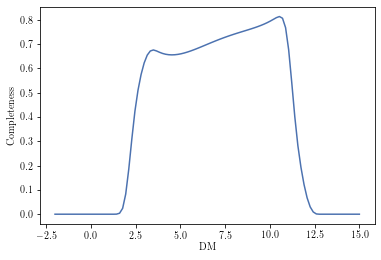

In [44]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

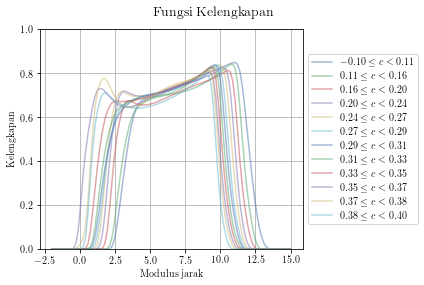

'gaia_(0.38)_(0.40).hdf5'

In [45]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# fig.savefig(join('img', "fungsi-kelengkapan-no.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [46]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

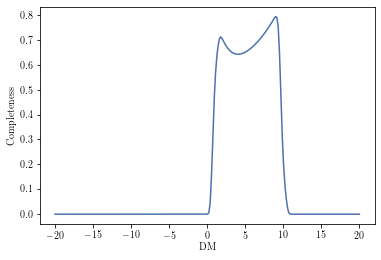

In [47]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [48]:
R = 150
Z = 396.44960851

In [49]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [50]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        # b = np.arctan(zz/rr)
        # if np.abs(zz) < 50:
        eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 388.76it/s]


(0.0, 1.0)

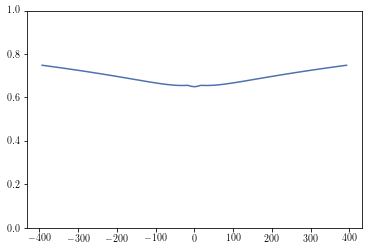

In [18]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

only for index 0 and 2, cut the midplane

100%|██████████| 499/499 [00:01<00:00, 392.53it/s]


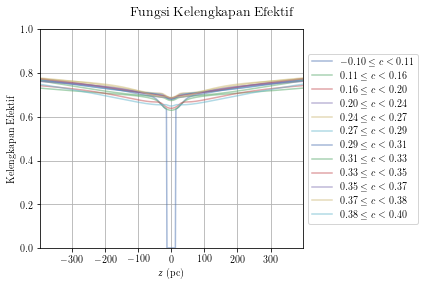

In [72]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 396.44960851
R = 150
ez = np.linspace(-Z, Z, 500) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
fracs = np.empty((len(files), len(z)))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            b = np.arctan(zz/rr)
            if np.abs(zz) < 13.79310345 and i < 1:
                continue
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
    fracs[i] = frac
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-Z, Z)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# fig.savefig(join('img', "fungsi-kelengkapan-efektif-no.pdf"), dpi=200)

In [73]:
df = vaex.from_arrays(z=z)
for i in range(len(files)):
    df[str(i)] = fracs[i]
df

#,z,0,1,2,3,4,5,6,7,8,9,10,11
0,-395.6551203165932,0.7734588031422185,0.7312843581698955,0.7424849314999173,0.7644668193835468,0.77756402242898,0.7682705841624763,0.7704044642479003,0.7646345964627905,0.7741264601424465,0.7618955117353707,0.7736947798938787,0.7489587224362103
1,-394.06614392977957,0.7732258405901855,0.7310802316966131,0.7422909702391937,0.7643007585050986,0.7773506409644422,0.7679698801562168,0.770068578786956,0.7642629372117944,0.7738391832560769,0.7617044839499741,0.7735032273141279,0.7485821350283011
2,-392.47716754296596,0.772992058790857,0.7308753873823739,0.7420963268849874,0.7641341136489911,0.7771365091124008,0.7676681186798103,0.7697315121350717,0.7638899709660308,0.7735508961180148,0.761512784387095,0.773311001111378,0.7482042232950318
3,-390.8881911561523,0.7727574524197375,0.7306698205617481,0.7419009970042013,0.7639668810198075,0.7769216219958983,0.7673652928604926,0.7693932566153909,0.7635156892310114,0.7732615921623796,0.7613204086806826,0.7731180969075824,0.7478249786292769
4,-389.29921476933873,0.7725219179497625,0.7304639964619846,0.7417048110050452,0.7637990643528954,0.7767060357327886,0.7670618272191355,0.7690542951263442,0.7631405524580049,0.7729717193282168,0.761127987154744,0.7729251874456786,0.7474447591387641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,389.2992147693387,0.7725219179497625,0.7304639964619846,0.7417048110050452,0.7637990643528954,0.7767060357327886,0.7670618272191355,0.7690542951263442,0.7631405524580049,0.7729717193282168,0.761127987154744,0.7729251874456786,0.7474447591387641
495,390.8881911561523,0.7727574524197375,0.7306698205617481,0.7419009970042013,0.7639668810198075,0.7769216219958983,0.7673652928604926,0.7693932566153909,0.7635156892310114,0.7732615921623796,0.7613204086806826,0.7731180969075824,0.7478249786292769
496,392.47716754296596,0.772992058790857,0.7308753873823739,0.7420963268849874,0.7641341136489911,0.7771365091124008,0.7676681186798103,0.7697315121350717,0.7638899709660308,0.7735508961180148,0.761512784387095,0.773311001111378,0.7482042232950318
497,394.06614392977957,0.7732258405901855,0.7310802316966131,0.7422909702391937,0.7643007585050986,0.7773506409644422,0.7679698801562168,0.770068578786956,0.7642629372117944,0.7738391832560769,0.7617044839499741,0.7735032273141279,0.7485821350283011


In [74]:
df.export(join(data_dir, "effective-volume-completeness.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.08s =  0.0m =  0.0h
 

see example

In [75]:
index = 0
name = files[index].split("/")[-1] 
gaia = vaex.open(join(spectral_dir, name))
compz = interpolate.interp1d(z, fracs[index], fill_value='interpolate', bounds_error=False)
if index < 1:
    gaia = gaia.filter(f"abs(z) > 13.79310345")
    gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800052642822266,2.1564118070290146,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8730981349945068,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.656183260425856,2.2724350893667364
1,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599
2,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.590409755706787

<ipython-input-76-0b39ba65c7b1>:6: RuntimeWarning: invalid value encountered in divide
  zcor = znum/compz(zmid)


27.586206896551744

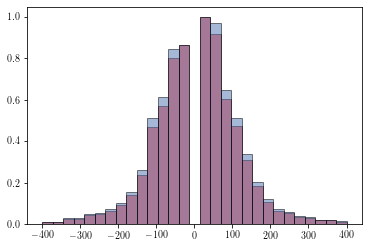

In [76]:
zedge = np.linspace(-400, 400, 30) #edges
zmid = (zedge[:-1]+zedge[1:])/2
zs = gaia["z"].to_numpy()
dz = zedge[1]-zedge[0]
znum, _ = np.histogram(zs, bins=zedge)
zcor = znum/compz(zmid)
mask = znum > 0
zcor = zcor[mask]
zmid = zmid[mask]

znum_raw, _ = np.histogram(zs, bins=zedge)
znum_raw = znum_raw[mask]

dz = zedge[1]-zedge[0]
plt.bar(zmid, zcor/zcor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
plt.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
# plt.yscale("log")
dz

# All out

<ipython-input-91-af024fe05d17>:60: RuntimeWarning: invalid value encountered in divide
  zcor = np.select([compz(zmid) > 0], [znum/compz(zmid)], default=0)


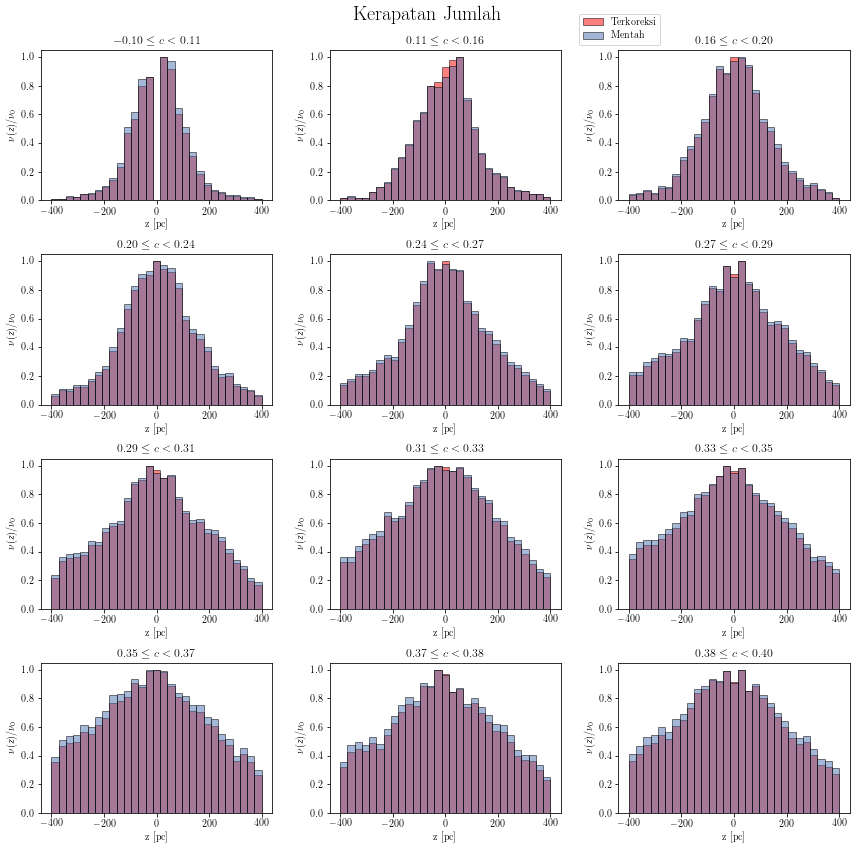

In [91]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

Z = 396.44960851
R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, ax) in enumerate(zip(files, axes.flatten())):
    ez = np.linspace(-Z, Z, 500)  # edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]

    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    # plt.plot(DM, compDM)
    # plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(
        DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance = np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if np.abs(zz) < 13.79310345 and i < 1:
                continue
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(
        z, frac, fill_value='interpolate', bounds_error=False)
    # plt.plot(z, frac)
    # plt.show()
    gaia = vaex.open(join(spectral_dir, name))
    if i < 1:
        gaia = gaia.filter(f"abs(z) > 13.79310345")
        gaia = gaia.extract()

    zedge = np.linspace(-400, 400, 30)  # edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    dz = zedge[1]-zedge[0]
    znum, _ = np.histogram(zs, bins=zedge)
    # print(compz(zmid))
    zcor = np.select([compz(zmid) > 0], [znum/compz(zmid)], default=0) 
    # print(zcor)
    mask = zcor > 0
    zcor = zcor[mask]
    zmid = zmid[mask]

    znum_raw, _ = np.histogram(zs, bins=zedge)
    znum_raw = znum_raw[mask]
    # break
    dz = zedge[1]-zedge[0]
    ax.bar(zmid, zcor/zcor.max(), width=dz,
            edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    # ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    # df.export(join(data_dir, name), progress=True)
    if i == 2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right",
                  bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig(join("img", "kerapatan-jumlah-no.pdf"), bbox_inches="tight")